In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import re
import nltk
import sklearn
%matplotlib inline

In [2]:
clean_data = pd.read_excel('clean.xlsx')

In [3]:
clean_data = clean_data.iloc[np.random.permutation(len(clean_data))]

In [4]:
clean_data = clean_data.reset_index(drop=True)

# Making bag of words model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

allthetext = []
for i in xrange(len(clean_data)):
    allthetext.append(clean_data['Text'][i])

In [6]:
len(allthetext)

21768

In [7]:
allthewords = {}

for text in allthetext:
    for word in text.split():
        if word in allthewords:
            allthewords[word] = allthewords[word] + 1
        else:
            allthewords[word] = 1
    


In [8]:
import operator
sorted_all = sorted(allthewords.items(), key=operator.itemgetter(1))

In [9]:
sorted_all.reverse()

In [10]:
len(allthewords)

58682

# There are 58683 unique words, and I have to select which are the most important ones(by frequency) for feature

In [11]:
np.unique(clean_data['Category'])

array([u'Canola', u'Corn', u'Hay & Forage', u'Pulse', u'Soybeans', u'Wheat'], dtype=object)

In [12]:
subset_sorted = [(a,b) for (a,b) in sorted_all if b>1000]

In [13]:
len(subset_sorted)

1065

# Seems like 1000 frequency threshold gives 1066 unique words, lets keep that for now

In [14]:
feature_words = [a for (a,b) in subset_sorted]

In [15]:
vectorizer = CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, max_features=500)

In [16]:
clean_text_list = []
for i in xrange(len(clean_data)):
    clean_text_list.append(clean_data['Text'][i])

In [17]:
train_features = vectorizer.fit_transform(clean_text_list)

In [18]:
vocab = vectorizer.get_feature_names()
#print(vocab)

In [19]:
train_features = train_features.toarray()

In [20]:
train_features.shape

(21768, 500)

# Creating a training, validation and test split

In [21]:
from sklearn.cross_validation import train_test_split

data_train_and_validation, data_test, labels_train_and_validation, labels_test = train_test_split(train_features, clean_data['Category'], test_size = 0.10, random_state = 0)

In [22]:
data_train, data_validation, labels_train, labels_validation = train_test_split(data_train_and_validation, labels_train_and_validation, test_size = 0.20, random_state = 0)

In [23]:
print(len(data_train))
print(len(data_validation))
print(len(data_test))

15672
3919
2177


In [24]:
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

15672
3919
2177


# Trying out out of the box Random Forest model

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [33]:
scores_validation = []
scores_train = []
for i in xrange(300,1000,100):
    print(i)
    forest = RandomForestClassifier(n_estimators = i)
    forest = forest.fit(data_train, labels_train)
    
    results_validation = forest.predict(data_validation)
    curr_score_valid = sklearn.metrics.accuracy_score(labels_validation, results_validation, normalize = True)
    
    results_train = forest.predict(data_train)
    curr_score_train = sklearn.metrics.accuracy_score(labels_train, results_train, normalize=True)
    
    scores_validation.append((i,curr_score_valid))
    scores_train.append((i,curr_score_train))

300
400
500
600
700
800
900


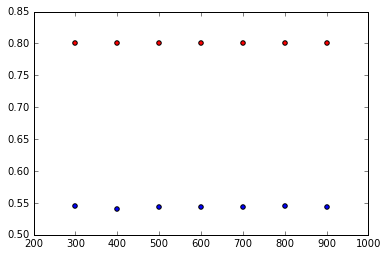

In [34]:
plt.scatter(*zip(*scores_train),c='r')
plt.scatter(*zip(*scores_validation),c='b')

In [35]:
forest = RandomForestClassifier(n_estimators = 500)
forest = forest.fit(data_train, labels_train)
    
results_validation = forest.predict(data_validation)
curr_score_valid = sklearn.metrics.accuracy_score(labels_validation, results_validation, normalize = True)
curr_score_valid    

0.54095432508292929

In [38]:
5904/float(len(clean_data))

0.27122381477398017